In [ ]:
# Convolutional Neural Network 
# Convolutional  Neural  Network”  indicates  that  the network  employs  amathematical operation called convolution

# CIFAR-10
# The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collectionof images 
# that are commonly used to train machine learning and computer visionalgorithms

# Import modules
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Dropout
from keras.constraints import maxnorm

# Prepare data for training & testing
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)

train_images=train_images/255.0
test_images=test_images/255.0

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [ ]:
model = models.Sequential()

# # 3 X 3 크기의 32개의 마스크 적용
model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2)) # drop out 0.2: 은닉층에 배치된 노드 중 20%를 임의로 꺼줌.
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2))) # 맥스 풀링


# 3 X 3 크기의 64개의 마스크 적용
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# 3 X 3 크기의 128개의 마스크 적용
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# 2차원 배열 -> 1차원 배열

model.add(layers.Flatten())
model.add(Dropout(0.3))

# 512 개의 노드를 가진 층
model.add(layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))

# 256 개의 노드를 가진 층
model.add(layers.Dense(256, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))

# 128 개의 노드를 가진 층
model.add(layers.Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))

# 출력층 생성
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [ ]:
# Use one-hot-encoding to use Categorical Cross Entropy for loss function
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Specify optimizer (ADAM) & loss function(CategoricalCrossentropy)
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# Training
history=model.fit(train_images, train_labels, epochs=100, batch_size= 100, validation_data=(test_images, test_labels))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


500/500 [==============================] - 27s 35ms/step - loss: 1.8221 - accuracy: 0.3095 - val_loss: 1.4387 - val_accuracy: 0.4693
Epoch 2/100
500/500 [==============================] - 17s 34ms/step - loss: 1.3691 - accuracy: 0.5043 - val_loss: 1.1764 - val_accuracy: 0.5813
Epoch 3/100
500/500 [==============================] - 17s 35ms/step - loss: 1.1482 - accuracy: 0.5909 - val_loss: 1.0147 - val_accuracy: 0.6449
Epoch 4/100
500/500 [==============================] - 17s 34ms/step - loss: 1.0241 - accuracy: 0.6417 - val_loss: 1.0163 - val_accuracy: 0.6546
Epoch 5/100
500/500 [==============================] - 17s 35ms/step - loss: 0.9310 - accuracy: 0.6761 - val_loss: 0.8686 - val_accuracy: 0.6958
Epoch 6/100
500/500 [==============================] - 17s 34ms/step - loss: 0.8607 - accuracy: 0.7013 - val_loss: 0.8535 - val_accuracy: 0.6985
Epoch 7/100
500/500 [==============================] - 17s 35ms/step - loss: 0.8016 - accuracy: 0.7260 - val_loss: 0.7721 - val_accuracy: 0.73

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"test_accuaracy is {test_acc:.3}")
print(f"test_loss is {test_loss:.3}")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 3s - loss: 0.5487 - accuracy: 0.8419 - 3s/epoch - 8ms/step
test_accuaracy is 0.842
test_loss is 0.549


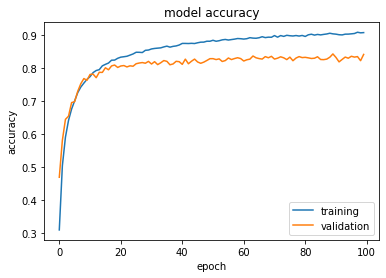

In [ ]:
# Draw plot of accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

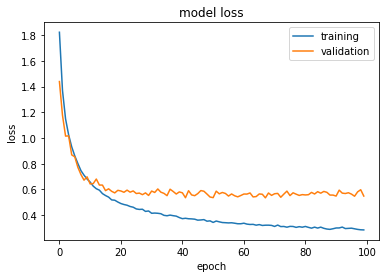

In [ ]:
#Draw plot of loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()